# Competions and Data challenges Tricks

### OUTLINES
• General introduction

• Understanding the Competition

• Visualizing the data

• Data Pre-processing

• Creating a Baseline model

• Improving the model

### The purposes of Competions and Data challenges
<img src="kag_zind.png"
      />
     
• They are channels for problem-solving

• Rapid prototyping

• Practices for learners

• Creativity in data-related fields

• The experience you get is invaluable in preparing you to understand what goes
into finding feasible solutions for big data.

### Understanding the Competion

Description, Data, Evaluation, Timeline

[Kaggle](https://www.kaggle.com/c/ammi-2020-convnets/overview) | [Zindi](https://zindi.africa/hackathons/umojahack-ghana-expresso-churn-prediction-challenge)

### Data Visualization and pre-processing
<img src="data_visualization.jpg"/>

In [16]:
import numpy as np
np.random.seed(54321)
p = 2

def generate_Xy(n_samples, p=2, sigma=.2):
    # Half of y is 1s, other half is -1
    y = np.ones(n_samples)
    mid = int(n_samples / 2)
    y[mid:] *= -1
    
    X = np.random.normal(0, sigma, (n_samples, p))
    X += (1 - y[:, np.newaxis]) / 2 # add 1 when y = -1
    # X of shape (n, p)
    # y vector of length n
    return X, y

# Training data
X_train, y_train = generate_Xy(20000)

# Testing data
X_test, y_test = generate_Xy(100)

# Visualize training data
def plot_data(X, y):
    plt.figure(figsize=(8,7))
    plt.scatter(X[:, 0], X[:, 1], c=y)
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    plt.show()
    
#plot_data(X_train, y_train)


### Data visualization with seabon
[01-Distribution Plots](http://localhost:8888/notebooks/AIMS_GHANA_AMMI_NOTES/JOB/10Academy/tutor/Data-Visualization-with-Seaborn/01-Distribution%20Plots.ipynb)

[02-Categorical Plots](http://localhost:8888/notebooks/AIMS_GHANA_AMMI_NOTES/JOB/10Academy/tutor/Data-Visualization-with-Seaborn/02-Categorical%20Plots.ipynb)

[03-Matrix Plots](http://localhost:8888/notebooks/AIMS_GHANA_AMMI_NOTES/JOB/10Academy/tutor/Data-Visualization-with-Seaborn/03-Matrix%20Plots.ipynb)

[04-Grids](http://localhost:8888/notebooks/AIMS_GHANA_AMMI_NOTES/JOB/10Academy/tutor/Data-Visualization-with-Seaborn/04-Grids.ipynb)

[05-Regression Plots](http://localhost:8888/notebooks/AIMS_GHANA_AMMI_NOTES/JOB/10Academy/tutor/Data-Visualization-with-Seaborn/05-Regression%20Plots.ipynb)

[06-Style and Color](http://localhost:8888/notebooks/AIMS_GHANA_AMMI_NOTES/JOB/10Academy/tutor/Data-Visualization-with-Seaborn/06-Style%20and%20Color.ipynb)

[07-Seaborn Exercises](http://localhost:8888/notebooks/AIMS_GHANA_AMMI_NOTES/JOB/10Academy/tutor/Data-Visualization-with-Seaborn/07-Seaborn%20Exercises.ipynb)

#### Matpplotlib
Matplotlib is the "grandfather" library of data visualization with Python.

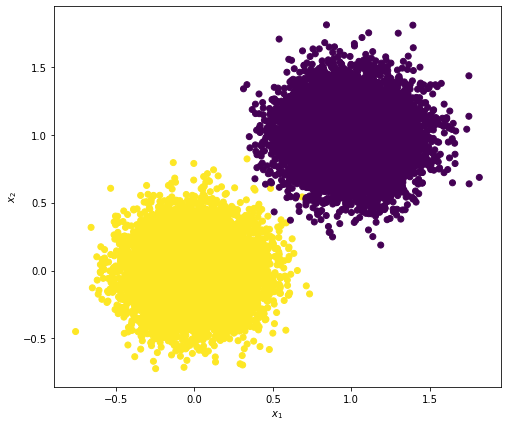

In [18]:
#training set, Scatter plot
plot_data(X_train, y_train)

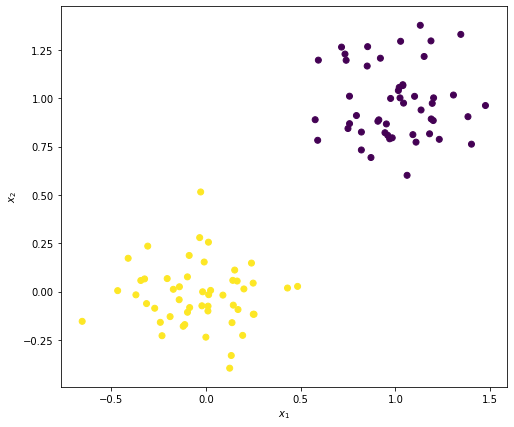

In [19]:
# Test set, scatter plot
plot_data(X_test, y_test)

In [73]:

from collections import Counter
from sklearn.datasets import make_classification
from matplotlib import pyplot
from numpy import where
# define dataset
X, y = make_classification(n_samples=1000, n_features=2, n_redundant=0,
	n_clusters_per_class=1, weights=[0.3,0.6], flip_y=0, random_state=1,n_classes=3)
# summarize class distribution
counter = Counter(y)
# scatter plot of examples by class label

Counter({1: 600, 0: 300, 2: 100})


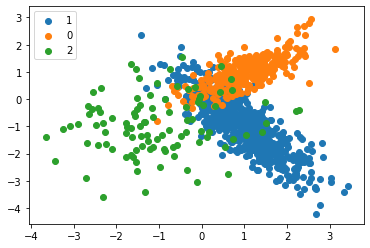

In [74]:
print(counter)
for label, _ in counter.items():
    row_ix = where(y == label)[0]
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

(array([300.,   0.,   0.,   0.,   0., 600.,   0.,   0.,   0., 100.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

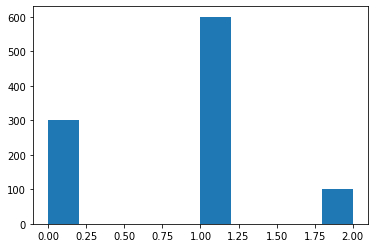

In [75]:
plt.hist(y)

### Data preprocessing

- Data processing depends on the task(competion)
    - Computer vision
    - NLP
    - ML & DS
    - Bio-informatics and Time series
    - Etc.
- Some common preprocessing
    - Scaling | Normalization | Standardization
    - Miss values
    - Outliers

### Data preprocessing cont'd

In [89]:
import numpy as np
import pandas as pd
data = pd.DataFrame({'A':[1,2,np.nan],
                  'B':[5,np.nan,np.nan],
                  'C':[1,2,3]})


In [84]:
data

,A,B,C
0,1.0,5.0,1
1,2.0,NaN,2
2,NaN,NaN,3


In [85]:
data.dropna()

,A,B,C
0,1.0,5.0,1


In [86]:
data.dropna(thresh=2)

,A,B,C
0,1.0,5.0,1
1,2.0,NaN,2


### Data preprocessing cont'd

In [87]:
data.fillna(value='FILL VALUE')

,A,B,C
0,1,5,1
1,2,FILL VALUE,2
2,FILL VALUE,FILL VALUE,3


In [88]:
data['A'].fillna(value=data['A'].mean())

0    1.0
1    2.0
2    1.5
Name: A, dtype: float64

### Data preprocessing cont'd
- [Features preprocessing sklearn](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing)
- [Feature preprocessing CV torch](https://pytorch.org/docs/stable/torchvision/transforms.html)

**Note**: Depending the libraries that yu are familiar with, you should check how you the trasforms should be done

### Submission format and evaluation

[kaggle](https://www.kaggle.com/c/ammi-2020-convnets/overview/evaluation) | [Zindi](https://zindi.africa/hackathons/umojahack-ghana-expresso-churn-prediction-challenge)


### Evaluation-Log loss
$\text {LogarithmicLoss}=\frac{-1}{N} \sum_{i=1}^{N} \sum_{j=1}^{M} y_{i j} * \log \left(p_{i j}\right)$

$y_{ij}$, indicates whether sample $i$ belongs to class $j$ or not

$p_{ij}$, indicates the probability of sample $i$ belonging to class $j$

Log Loss has no upper bound and it exists on the range $[0, ∞)$
Log Loss nearer to 0 indicates higher accuracy, whereas if the Log Loss is away from 0 then it indicates lower accuracy.

### Evaluation-Mean abolute error

$\text {Mean AbsoluteError }=\frac{1}{N} \sum_{j=1}^{N}\left|y_{j}-\hat{y}_{j}\right|$

### Evaluation-Mean squared error

$\text {Mean squaredError }=\frac{1}{N} \sum_{j=1}^{N}\left(y_{j}-\hat{y}_{j}\right)^2$

### Evaluation metrics sklearn

[Evaluation sklearn](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics)

Other libries like pytorch they use sklean evaluation metrics

### A starter Notebook and Baseline Model
- Read data
- Set the seed
- Preprocess and Visualize
- SImple model First
- Your prediction and submission format

[Example]()